In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib
import numpy as np
import h5py
import math
import os, sys
%load_ext autoreload
%autoreload 2
# sys.path.append('/home/jingmingruan/ownCloud/dataprocessing')
# sys.path.append('/home/jingmingruan/TUD/DeepNL/cloud/dataprocessing')
from plot_3D_Xflt import *

# Load data

In [2]:
dyn = 1
seis = 0
vline = 1.0
axis = 1
mask = 0.6
delta = 0
xyaxis = 1
projection=True
vline = 0.8

# Zeerijp = plot3D("/palmyra/data/jingmingruan/models/3D/intersection_angle/newkxky/45/result/Buijze3D_fe01mpa.h5",dyn=dyn,xflt=0,seis=seis)
# Zeerijp = plot3D("/palmyra/data/jingmingruan/models/3D/intersection_angle/newkxky/45/run30/Buijze3D_fe.h5",dyn=dyn,xflt=0,seis=seis)

# Zeerijp  = plot3D("/palmyra/data/jingmingruan/models/3D/intersection_angle/newkxky/30_60/run60/result/Buijze3D_fe_01mpa.h5",dyn=dyn,seis=seis,xflt=0)
# tri_file = "/palmyra/data/jingmingruan/models/3D/intersection_angle/newkxky/30_60/run60/result/flt_tri_nob.npy"

# Zeerijp = plot3D("/media/jingmingruan/BACKUP/TUD/palmyra/newkxky/45/Buijze3D_fe.h5",dyn=dyn,xflt=0,seis=seis)
# Zeerijp = plot3D("/palmyra/data/jingmingruan/models/3D/Xflt/45/result/01mpa/Buijze3D_fe.h5",dyn=1,xflt=1,seis=seis)
# tri_file = "/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/flt_tri_nob.npy" 


In [5]:
if dyn:
    print (Zeerijp.dat_trac_sort.keys())
    print (Zeerijp.dat_log)
    print (Zeerijp.dat_log_dyn)

dict_keys(['step 10', 'step 11', 'step 12', 'step 13', 'step 14', 'step 15', 'step 16', 'step 18', 'step 19', 'step 20', 'step 21', 'step 22', 'step 23', 'step 24', 'step 25', 'step 26', 'step 27', 'step 28', 'step 9'])
[[ 9  0]
 [10  0]
 [11  0]
 [12  0]
 [13  0]
 [14  0]
 [15  0]
 [16  0]
 [18  0]
 [19  0]
 [20  0]
 [21  0]
 [22  0]
 [23  0]
 [24  0]
 [25  0]
 [26  0]
 [27  0]
 [28  1]
 [28  0]]
[ 21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341 361
 561]


In [6]:
def scatter3d(x,y,z, cs, colorsMap='seismic',zlim0=False,zlim1=False,v0=False):
    cm = plt.get_cmap(colorsMap)
    fig = plt.figure()
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    vmin = np.min(cs)
    vmax = np.max(cs)
    vabs =(np.abs(cs))
    print (vmin,vmax)
    if v0:
        cNorm = matplotlib.colors.Normalize(vmin=min(-1*vabs), vmax=max(vabs))
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
        ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    else:
        cNorm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
        ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap,label='Test')
    ax.view_init(20, 30)
    if zlim0:
        ax.set_zlim(zlim0,zlim1)
    plt.show()


In [45]:
# font = {'weight' : 'bold',
#         'size'   : 14}

# matplotlib.rc('font', **font)
# matplotlib.rc('image', cmap='seismic')

In [7]:
Zeerijp.dat_trac_sta.shape

(138341, 4, 28)

# Plot the static stress:

In [8]:
axiss = 1
step = 28 # start with 0 (initialize step (step 0) is not recoreded here) (depletion start with k (not + or - 1))
inter = 44
start = 0
end = -1 # 3732 3781 3830

## Absolute form

-9.40741652529357 7.668749550410054


<ipython-input-6-06a36a15d423>:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap,label='Test')


<Figure size 432x288 with 0 Axes>

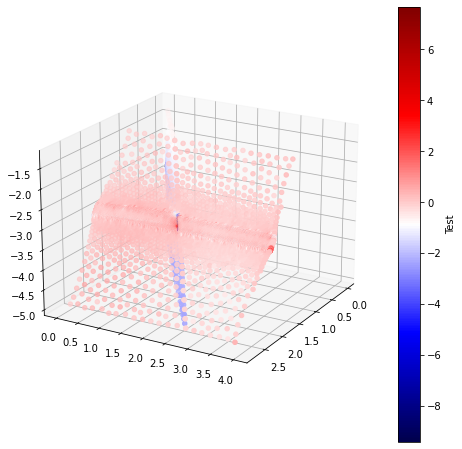

-10.90383525166228 17.68044826218773


<Figure size 432x288 with 0 Axes>

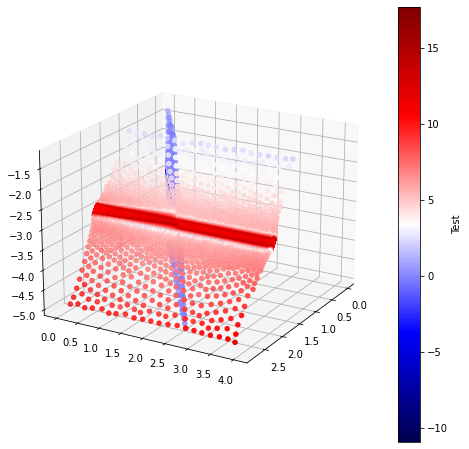

-32.461716155597045 -5.681934407235335


<Figure size 432x288 with 0 Axes>

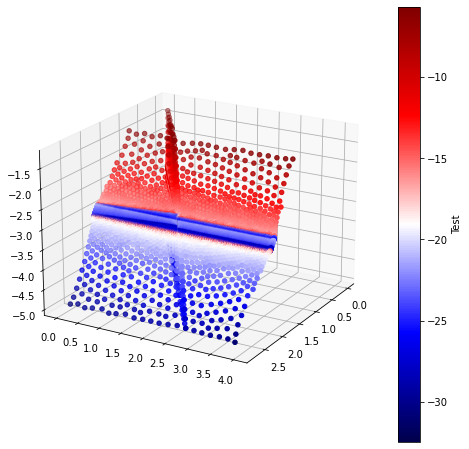

14.986085017334188 56.122350044401564


<Figure size 432x288 with 0 Axes>

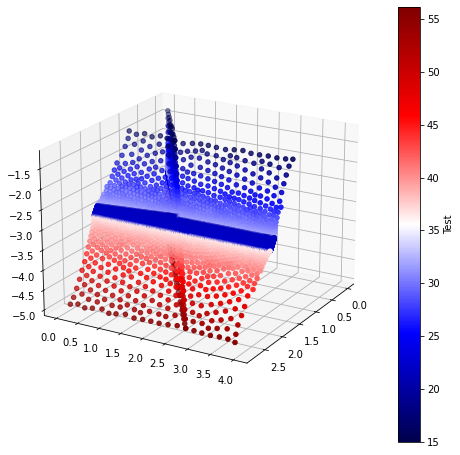

In [9]:
# absolute form
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,0,step-1]/1e6).flatten()

scatter3d(x,y,z,ccss)

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,1,step-1]/1e6).flatten()
scatter3d(x,y,z,ccss)

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,2,step-1]/1e6).flatten()

scatter3d(x,y,z,ccss)

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,3,step-1]/1e6).flatten()

scatter3d(x,y,z,ccss)

In [ ]:
# SCU
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
fshr = np.sqrt((Zeerijp.dat_trac_sta[start:end,0,step-1]/1e6).flatten()**2+(Zeerijp.dat_trac_sta[start:end,1,step-1]/1e6).flatten()**2)
fnrm = np.abs(Zeerijp.dat_trac_sta[start:end,2,step-1]/1e6).flatten()
ccss = fshr/fnrm

scatter3d(x,y,z,ccss,colorsMap='coolwarm')

## incremental form

-12.49999999999956 0.0


<ipython-input-44-06a36a15d423>:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap,label='Test')


<Figure size 432x288 with 0 Axes>

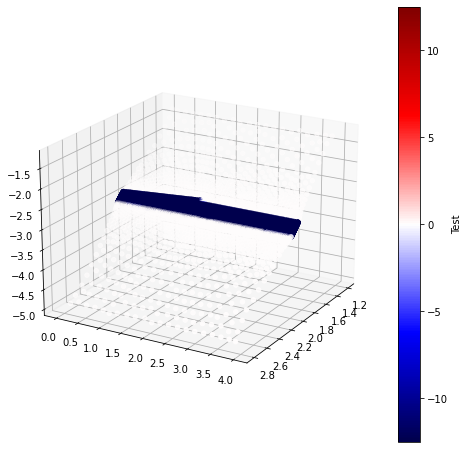

In [94]:
# # incremental form
# x = Zeerijp.fcoord[start:end,0]
# y = Zeerijp.fcoord[start:end,1]
# z = Zeerijp.fcoord[start:end,2]
# ccss = (Zeerijp.dat_trac_sta[start:end,0,step-1]/1e6).flatten() - (Zeerijp.dat_trac_sta[start:end,0,0]/1e6).flatten()
# scatter3d(x,y,z,ccss,v0=True)

# x = Zeerijp.fcoord[start:end,0]
# y = Zeerijp.fcoord[start:end,1]
# z = Zeerijp.fcoord[start:end,2]
# ccss = (Zeerijp.dat_trac_sta[start:end,1,step-1]/1e6).flatten() - (Zeerijp.dat_trac_sta[start:end,1,0]/1e6).flatten()
# scatter3d(x,y,z,ccss,v0=True)

# x = Zeerijp.fcoord[start:end,0]
# y = Zeerijp.fcoord[start:end,1]
# z = Zeerijp.fcoord[start:end,2]
# ccss = (Zeerijp.dat_trac_sta[start:end,2,step-1]/1e6).flatten() - (Zeerijp.dat_trac_sta[start:end,2,0]/1e6).flatten()
# scatter3d(x,y,z,ccss,v0=True)

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,3,step-1]/1e6).flatten() - (Zeerijp.dat_trac_sta[start:end,3,0]/1e6).flatten()
scatter3d(x,y,z,ccss,v0=True)

-12.59999999999959 0.0


<ipython-input-44-06a36a15d423>:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap,label='Test')


<Figure size 432x288 with 0 Axes>

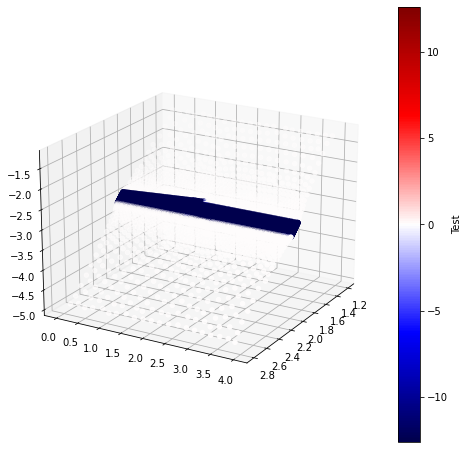

In [104]:
axiss = 1
step = 33
inter = 44
start = 0
end = -1 # 3732 3781 3830

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,3,step-1]/1e6).flatten() - (Zeerijp.dat_trac_sta[start:end,3,0]/1e6).flatten()
scatter3d(x,y,z,ccss,v0=True)

## comparison with the convential method

In [ ]:
step = 20
start = 0
end = 6400

In [ ]:
# Comparing with conventional method
Zeerijp_conv = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_90_conv.h5",dyn=dyn,xflt=0,seis=seis)
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,0,step-1]/1e6).flatten() - (Zeerijp_conv.dat_trac_sta[start:end,0,step-1]/1e6).flatten()
scatter3d(x,y,z,ccss,v0=True)

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,1,step-1]/1e6).flatten() - (Zeerijp_conv.dat_trac_sta[start:end,1,step-1]/1e6).flatten()
scatter3d(x,y,z,ccss,v0=True)

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,2,step-1]/1e6).flatten() - (Zeerijp_conv.dat_trac_sta[start:end,2,step-1]/1e6).flatten()
scatter3d(x,y,z,ccss,v0=True)

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,3,step-1]/1e6).flatten() - (Zeerijp_conv.dat_trac_sta[start:end,3,step-1]/1e6).flatten()
scatter3d(x,y,z,ccss,v0=True)

In [ ]:
axiss = 2
start = 0
end = -29*2 # 3732 3781 3830
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = np.abs(Zeerijp.dat_trac_sta[start:end,2]/1e6).flatten() + (Zeerijp.dat_trac_sta[start:end,3]/1e6).flatten()

scatter3d(x,y,z,ccss)

In [ ]:
axiss = 2
start = 0
end = -29 # 3732 3781 3830
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,axiss]/1e6).flatten()

scatter3d(x,y,z,ccss)

In [ ]:
Zeerijp.plot_static(tstep_list=[1],axis=1,
                    scatter=1,vdegree=27, azimuth=-50)

In [ ]:
axiss = 2
start = 0
end = -53*2 # 3732 3781
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,axiss,step]/1e6).flatten()

scatter3d(x,y,z,ccss)

In [ ]:
axiss = 1
start = 0
end = -53*2 # 3732 3781
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,axiss,step]/1e6).flatten()

scatter3d(x,y,z,ccss)

In [ ]:
axiss = 0
start = 0
end = -53*2 # 3732 3781
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,axiss,step]/1e6).flatten()

scatter3d(x,y,z,ccss)

In [ ]:
axiss = 2
start = 0
end = 3830 # 3732 3781
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,axiss]/1e6).flatten()

scatter3d(x,y,z,ccss)

In [ ]:
axiss = 0
start = 0
end = -35*2 # 3732 3781
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sta[start:end,axiss]/1e6).flatten()

scatter3d(x,y,z,ccss)

# intersecting nodes

## ploting the Xflt nodes

In [3]:
# comapring stress on the main fault and the aux fault
axis = 0
step = 28
inter = 53

zlim0 = -3.1
zlim1 = -2.8

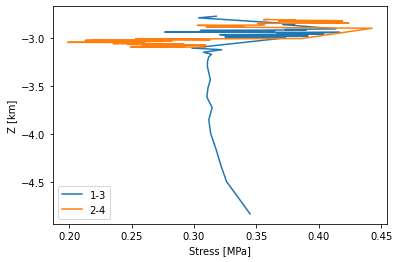

In [12]:
Zeerijp = plot3D("/palmyra/data/jingmingruan/models/3D/Xflt/45/result/01mpa/Buijze3D_fe.h5",dyn=dyn,xflt=0,seis=seis)
# Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_90_conv.h5",dyn=dyn,seis=seis)

start = -1*inter*2
end = -1*inter*1
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]

fshr = np.sqrt((Zeerijp.dat_trac_sta[start:end,0,step-1]/1e6)**2 + (Zeerijp.dat_trac_sta[start:end,1,step-1]/1e6)**2)
fnrm = np.abs((Zeerijp.dat_trac_sta[start:end,2,step-1]/1e6))
ccss = fshr/fnrm

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind],label='1-3')
# plt.xlabel('Stress [MPa]')
# plt.ylabel('Z [km]')
# plt.show()

start = -1*inter*1
end = -1
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]

fshr = np.sqrt((Zeerijp.dat_trac_sta[start:end,0,step-1]/1e6)**2 + (Zeerijp.dat_trac_sta[start:end,1,step-1]/1e6)**2)
fnrm = np.abs((Zeerijp.dat_trac_sta[start:end,2,step-1]/1e6))
ccss = fshr/fnrm

# fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind],label='2-4')
plt.xlabel('Stress [MPa]')
plt.ylabel('Z [km]')
plt.legend()
plt.show()

In [18]:
8.34 + 8.34

16.68

In [ ]:
Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_45_vo_load.h5",dyn=dyn,xflt=1,seis=seis)
# Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_90_conv.h5",dyn=dyn,seis=seis)

start = -1*inter*2
end = -1*inter*1
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]

fshr = np.sqrt((Zeerijp.dat_tracx_sta[start:end,0,step-1]/1e6)**2 + (Zeerijp.dat_tracx_sta[start:end,1,step-1]/1e6)**2)
fnrm = np.abs((Zeerijp.dat_tracx_sta[start:end,2,step-1]/1e6))
ccss = fshr/fnrm

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
# plt.xlabel('Stress [MPa]')
# plt.ylabel('Z [km]')
# plt.show()

start = -1*inter*1
end = -1
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]

fshr = np.sqrt((Zeerijp.dat_tracx_sta[start:end,0,step-1]/1e6)**2 + (Zeerijp.dat_tracx_sta[start:end,1,step-1]/1e6)**2)
fnrm = np.abs((Zeerijp.dat_tracx_sta[start:end,2,step-1]/1e6))
ccss = fshr/fnrm

# fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.xlabel('Stress [MPa]')
plt.ylabel('Z [km]')
plt.show()

In [ ]:
# comapring stress on the main fault and the aux fault
axis = 1
step = 23
inter = 53

zlim0 = -3.1
zlim1 = -2.8

In [ ]:
Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_45_vo_load.h5",dyn=0,xflt=1,seis=seis)
# Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_debug_90_80_load.h5",dyn=dyn,seis=seis)

start = -1*inter*2
end = -1*inter*1
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]

# fshr = np.sqrt((Zeerijp.dat_trac_sta[start:end,0,step-1]/1e6)**2 + (Zeerijp.dat_trac_sta[start:end,1,step-1]/1e6)**2)
# fnrm = np.abs((Zeerijp.dat_trac_sta[start:end,2,step-1]/1e6))
# ccss = fshr/fnrm
ccss = ((Zeerijp.dat_trac_sta[start:end,axis,step-1]/1e6)-(Zeerijp.dat_trac_sta[start:end,axis,0]/1e6))

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind],label='1-3')
# plt.xlabel('Stress [MPa]')
# plt.ylabel('Z [km]')
# plt.show()

start = -1*inter*1
end = -1
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]

# fshr = np.sqrt((Zeerijp.dat_trac_sta[start:end,0,step-1]/1e6)**2 + (Zeerijp.dat_trac_sta[start:end,1,step-1]/1e6)**2)
# fnrm = np.abs((Zeerijp.dat_trac_sta[start:end,2,step-1]/1e6))
# ccss = fshr/fnrm
ccss = ((Zeerijp.dat_trac_sta[start:end,axis,step-1]/1e6)-(Zeerijp.dat_trac_sta[start:end,axis,0]/1e6))

# fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind],label='2-4')
plt.xlabel('Stress [MPa]')
plt.ylabel('Z [km]')
plt.axhline(y=-2.8,ls='--', c='b',alpha=0.2)
plt.axhline(y=-2.85,ls='--',c='g',alpha=0.2)
plt.axhline(y=-2.90,ls='--',c='y',alpha=0.2)
plt.axhline(y=-3.00,ls='--',c='b',alpha=0.2)
plt.axhline(y=-3.05,ls='--',c='g',alpha=0.2)
plt.axhline(y=-3.1,ls='--', c='y',alpha=0.2)
plt.legend()
plt.show()

In [ ]:
Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_45_vo_load.h5",dyn=0,xflt=1,seis=seis)
# Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_debug_90_80_load.h5",dyn=dyn,seis=seis)

start = -1*inter*2
end = -1*inter*1
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]

# fshr = np.sqrt((Zeerijp.dat_trac_sta[start:end,0,step-1]/1e6)**2 + (Zeerijp.dat_trac_sta[start:end,1,step-1]/1e6)**2)
# fnrm = np.abs((Zeerijp.dat_trac_sta[start:end,2,step-1]/1e6))
# ccss = fshr/fnrm
ccss = ((Zeerijp.dat_tracx_sta[start:end,axis,step-1]/1e6)-(Zeerijp.dat_tracx_sta[start:end,axis,0]/1e6))

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind],label='1-3')
# plt.xlabel('Stress [MPa]')
# plt.ylabel('Z [km]')
# plt.show()

start = -1*inter*1
end = -1
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]

# fshr = np.sqrt((Zeerijp.dat_trac_sta[start:end,0,step-1]/1e6)**2 + (Zeerijp.dat_trac_sta[start:end,1,step-1]/1e6)**2)
# fnrm = np.abs((Zeerijp.dat_trac_sta[start:end,2,step-1]/1e6))
# ccss = fshr/fnrm
ccss = ((Zeerijp.dat_tracx_sta[start:end,axis,step-1]/1e6)-(Zeerijp.dat_tracx_sta[start:end,axis,0]/1e6))

# fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind],label='2-4')
plt.xlabel('Stress [MPa]')
plt.ylabel('Z [km]')
plt.axhline(y=-2.8,ls='--', c='b',alpha=0.2)
plt.axhline(y=-2.85,ls='--',c='g',alpha=0.2)
plt.axhline(y=-2.90,ls='--',c='y',alpha=0.2)
plt.axhline(y=-3.00,ls='--',c='b',alpha=0.2)
plt.axhline(y=-3.05,ls='--',c='g',alpha=0.2)
plt.axhline(y=-3.1,ls='--', c='y',alpha=0.2)
plt.legend()
plt.show()

In [ ]:
# differential version intersection
axiss = 0
step = 18
inter = 47
start = -1*inter*2 # 29 34
end = -1*inter # 3732 3781
zlim0 = -3.1
zlim1 = -2.8
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = ((Zeerijp.dat_trac_sta[start:end,axiss,step-1]-(Zeerijp.dat_trac_sta[start:end,axiss,1]))/1e6).flatten()
scatter3d(x,y,z,ccss,zlim0=zlim0,zlim1=zlim1)

start = -1*inter
end = -1 # 3732 3781
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = ((Zeerijp.dat_trac_sta[start:end,axiss,step-1]-(Zeerijp.dat_trac_sta[start:end,axiss,1]))/1e6).flatten()
scatter3d(x,y,z,ccss,zlim0=zlim0,zlim1=zlim1)


In [ ]:
# differential version intersection
axiss = 3
step = 20
inter = 44
start = -1*inter*2 # 29 34
end = -1*inter # 3732 3781
zlim0 = -3.1
zlim1 = -2.8
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = ((Zeerijp.dat_trac_sta[start:end,axiss,step-1]-(Zeerijp.dat_trac_sta[start:end,axiss,1]))/1e6).flatten()
# scatter3d(x,y,z,ccss,zlim0=zlim0,zlim1=zlim1)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.show()


start = -1*inter
end = -1 # 3732 3781
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = ((Zeerijp.dat_trac_sta[start:end,axiss,step-1]-(Zeerijp.dat_trac_sta[start:end,axiss,1]))/1e6).flatten()
# scatter3d(x,y,z,ccss,zlim0=zlim0,zlim1=zlim1)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.show()


In [ ]:
# SCU
axiss = 3
step = 20
inter = 44
start = -1*inter*2 # 29 34
end = -1*inter # 3732 3781
zlim0 = -3.1
zlim1 = -2.8
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
# ccss = ((Zeerijp.dat_trac_sta[start:end,axiss,step-1]-(Zeerijp.dat_trac_sta[start:end,axiss,1]))/1e6).flatten()
ssh = np.sqrt(((Zeerijp.dat_trac_sta[start:end,0,step-1]**2+Zeerijp.dat_trac_sta[start:end,1,step-1]**2)))
nrm = -1*Zeerijp.dat_trac_sta[start:end,2,step-1]
ccss = ssh/nrm
# scatter3d(x,y,z,ccss,zlim0=zlim0,zlim1=zlim1)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.show()


start = -1*inter
end = -1 # 3732 3781
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
# ccss = ((Zeerijp.dat_trac_sta[start:end,axiss,step-1]-(Zeerijp.dat_trac_sta[start:end,axiss,1]))/1e6).flatten()
ssh = np.sqrt(((Zeerijp.dat_trac_sta[start:end,0,step-1]**2+Zeerijp.dat_trac_sta[start:end,1,step-1]**2)))
nrm = -1*Zeerijp.dat_trac_sta[start:end,2,step-1]
ccss = ssh/nrm
# scatter3d(x,y,z,ccss,zlim0=zlim0,zlim1=zlim1)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.show()


In [ ]:
# ori version
axiss = 3
step = 20
start = 0 # 29 34
end = -1 # 3732 3781
zlim0 = -3.1
zlim1 = -2.8
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = ((Zeerijp.dat_trac_sta[start:end,axiss,step-1]-(Zeerijp.dat_trac_sta[start:end,axiss,1]))/1e6).flatten()
scatter3d(x,y,z,ccss)

start = 0
end = -1*inter*2 # 3732 3781
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = ((Zeerijp.dat_trac_sta[start:end,axiss,step-1]-(Zeerijp.dat_trac_sta[start:end,axiss,1]))/1e6).flatten()
scatter3d(x,y,z,ccss)


In [ ]:
# ori version
axiss = 3
step = 16
start = 0 # 29 34
end = -1 # 3732 3781
zlim0 = -3.1
zlim1 = -2.8
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = ((Zeerijp.dat_trac_sta[start:end,axiss,step-1])/1e6).flatten()
scatter3d(x,y,z,ccss)

start = 0
end = -53*2 # 3732 3781
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = ((Zeerijp.dat_trac_sta[start:end,axiss,step-1])/1e6).flatten()
scatter3d(x,y,z,ccss)


## plotting dynamic result

85313
53028
[      0 -138332]


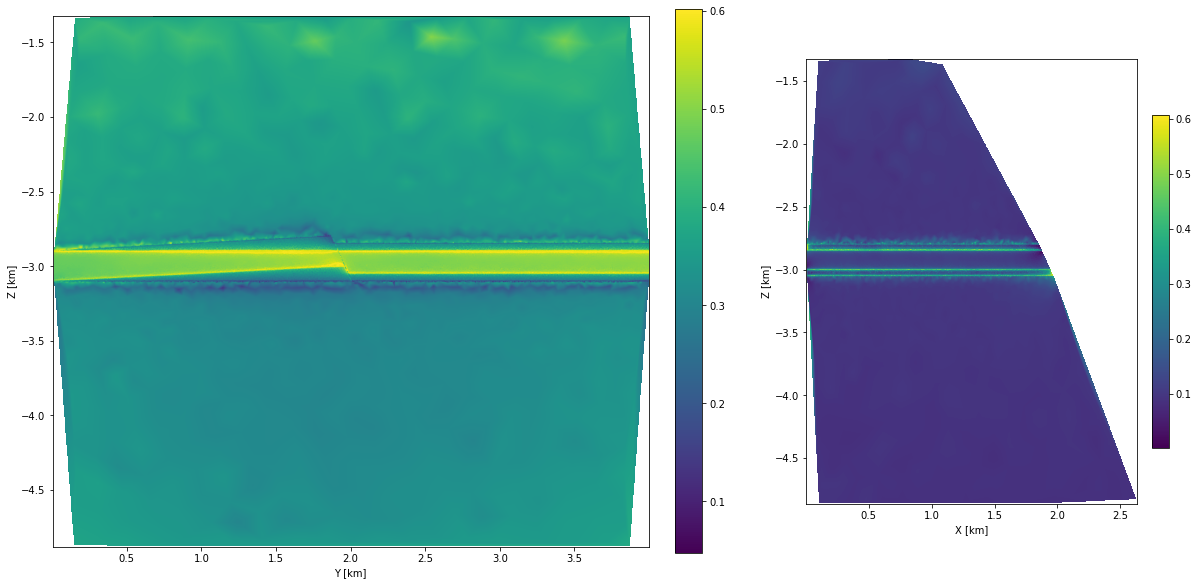

In [9]:
Zeerijp.plot_Xflt_str(step=28,dsp=1)

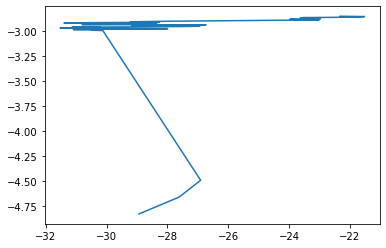

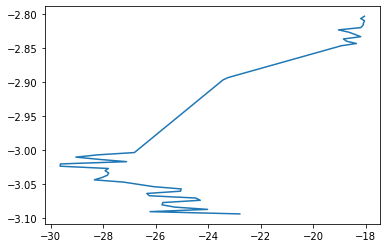

In [10]:
# differential version intersection
axiss = 3
step = 28
inter = 44
start = -1*inter*2 # 29 34
end = -1*inter # 3732 3781
zlim0 = -3.1
zlim1 = -2.8
step_dyn = 'step 20'
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sort[step_dyn][start:end,2,0]/1e6) - (Zeerijp.dat_trac_sta[start:end,3,20-1]/1e6)
ccss = (Zeerijp.dat_trac_sort[step_dyn][start:end,2,2]/1e6)
# ccss = (Zeerijp.dat_trac_sta[start:end,3,20-1]/1e6)
# ccss = (Zeerijp.dat_trac_sta[start:end,2,20-1]/1e6)
# scatter3d(x,y,z,ccss,zlim0=zlim0,zlim1=zlim1)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.show()


start = -1*inter
end = -1 # 3732 3781
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sort[step_dyn][start:end,2,0]/1e6) - (Zeerijp.dat_trac_sta[start:end,3,20-1]/1e6)
ccss = (Zeerijp.dat_trac_sort[step_dyn][start:end,2,2]/1e6)
# ccss = (Zeerijp.dat_trac_sta[start:end,2,20-1]/1e6)
# scatter3d(x,y,z,ccss,zlim0=zlim0,zlim1=zlim1)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.show()


In [11]:
# differential version intersection
Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_90_ho_xflt.h5",dyn=dyn,xflt=0,seis=seis)

step = 20
inter = 44
start = -1*inter*2 # 29 34
end = -1*inter # 3732 3781
# start = 0
# end = -100
zlim0 = -3.1
zlim1 = -2.8
step_dyn = 'step 20'
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sort[step_dyn][start:end,2,0]/1e6) - (Zeerijp.dat_trac_sta[start:end,3,20-1]/1e6)
ccss = (Zeerijp.dat_trac_sort[step_dyn][start:end,2,0]/1e6)
# ccss = (Zeerijp.dat_trac_sta[start:end,3,20-1]/1e6)
# ccss = (Zeerijp.dat_trac_sta[start:end,2,20-1]/1e6)
# scatter3d(x,y,z,ccss,zlim0=zlim0,zlim1=zlim1)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.show()


start = -1*inter # 29 34
end = -1 # 3732 3781

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sort[step_dyn][start:end,2,0]/1e6) - (Zeerijp.dat_trac_sta[start:end,3,20-1]/1e6)
ccss = (Zeerijp.dat_trac_sort[step_dyn][start:end,2,0]/1e6)
# ccss = (Zeerijp.dat_trac_sta[start:end,2,20-1]/1e6)
# scatter3d(x,y,z,ccss,zlim0=zlim0,zlim1=zlim1)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.show()


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_90_ho_xflt.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# differential version intersection
Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_90check.h5",dyn=dyn,xflt=1,seis=seis)

step = 20
inter = 44
start = -1*inter*2 # 29 34
end = -1*inter # 3732 3781
# start = 0
# end = -100
zlim0 = -3.1
zlim1 = -2.8
step_dyn = 'step 20'
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sort[step_dyn][start:end,2,0]/1e6) - (Zeerijp.dat_trac_sta[start:end,3,20-1]/1e6)
ccss = (Zeerijp.dat_trac_sort[step_dyn][start:end,0,1]/1e6)
# ccss = (Zeerijp.dat_trac_sta[start:end,3,20-1]/1e6)
# ccss = (Zeerijp.dat_trac_sta[start:end,2,20-1]/1e6)
# scatter3d(x,y,z,ccss,zlim0=zlim0,zlim1=zlim1)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.show()


start = -1*inter # 29 34
end = -1 # 3732 3781

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_trac_sort[step_dyn][start:end,2,0]/1e6) - (Zeerijp.dat_trac_sta[start:end,3,20-1]/1e6)
ccss = (Zeerijp.dat_trac_sort[step_dyn][start:end,0,1]/1e6)
# ccss = (Zeerijp.dat_trac_sta[start:end,2,20-1]/1e6)
# scatter3d(x,y,z,ccss,zlim0=zlim0,zlim1=zlim1)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.show()


In [ ]:
Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_90_ho_xflt.h5",dyn=dyn,xflt=0,seis=seis)
# Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_90_conv.h5",dyn=dyn,seis=seis)

# comapring stress on the main fault and the aux fault
axis = 0
step = 20
inter = 44
start = -1*inter*2 # 29 34
end = -1*inter
zlim0 = -3.1
zlim1 = -2.8

# start = 0
# end = -1

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]

ccss = (Zeerijp.dat_trac_sta[start:end,axis,step-1]/1e6) - (Zeerijp.dat_trac_sta[start:end,axis,1]/1e6)
ccss = (Zeerijp.dat_trac_sta[start:end,axis,step-1]/1e6)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.xlabel('Stress [MPa]')
plt.ylabel('Z [km]')
plt.show()

Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_90check.h5",dyn=dyn,xflt=1,seis=seis)

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]

ccss = (Zeerijp.dat_trac_sta[start:end,axis,step-1]/1e6) - (Zeerijp.dat_trac_sta[start:end,axis,1]/1e6)
ccss = (Zeerijp.dat_trac_sta[start:end,axis,step-1]/1e6)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.xlabel('Stress [MPa]')
plt.ylabel('Z [km]')
plt.show()

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_tracx_sta[start:end,axis,step-1]/1e6) - (Zeerijp.dat_tracx_sta[start:end,axis,1]/1e6)
ccss = (Zeerijp.dat_tracx_sta[start:end,axis,step-1]/1e6)
fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.xlabel('Stress [MPa]')
plt.ylabel('Z [km]')
plt.show()


In [ ]:
Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_90_ho_xflt.h5",dyn=dyn,xflt=0,seis=seis)
# Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_90_conv.h5",dyn=dyn,seis=seis)

# comapring stress on the main fault and the aux fault
start = -1*inter*1 # 29 34
end = -1
# start = 0
# end = -1
zlim0 = -3.1
zlim1 = -2.8
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]

ccss = (Zeerijp.dat_trac_sta[start:end,axis,step-1]/1e6) - (Zeerijp.dat_trac_sta[start:end,axis,1]/1e6)
ccss = (Zeerijp.dat_trac_sta[start:end,axis,step-1]/1e6)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.xlabel('Stress [MPa]')
plt.ylabel('Z [km]')
plt.show()

Zeerijp = plot3D("/home/jingmingruan/Desktop/defmod_runs/3D_Xflt/Buijze3D_fe_90check.h5",dyn=dyn,xflt=1,seis=seis)

zlim0 = -3.1
zlim1 = -2.8
x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]

ccss = (Zeerijp.dat_trac_sta[start:end,axis,step-1]/1e6) - (Zeerijp.dat_trac_sta[start:end,axis,1]/1e6)
ccss = (Zeerijp.dat_trac_sta[start:end,axis,step-1]/1e6)

fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.xlabel('Stress [MPa]')
plt.ylabel('Z [km]')
plt.show()

x = Zeerijp.fcoord[start:end,0]
y = Zeerijp.fcoord[start:end,1]
z = Zeerijp.fcoord[start:end,2]
ccss = (Zeerijp.dat_tracx_sta[start:end,axis,step-1]/1e6) - (Zeerijp.dat_tracx_sta[start:end,axis,1]/1e6)
ccss = (Zeerijp.dat_tracx_sta[start:end,axis,step-1]/1e6)
fig = plt.figure()
ind = np.argsort(z)
plt.plot(ccss[ind],z[ind])
plt.xlabel('Stress [MPa]')
plt.ylabel('Z [km]')
plt.show()


# contour

85313
53028
[      0 -138332]
1.0831289937290397e-17 0.0454296066631697
(85313, 200)
0.0 1000000000.0
3.649768885027699e-18 0.013700274621002336
0.0 1000000000.0


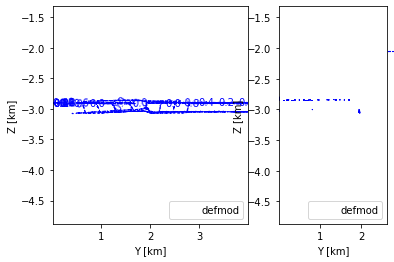

In [4]:
Zeerijp.plot_Xflt_rup_ct(step='step 28',dsp=1)

85313
53028
[      0 -138332]


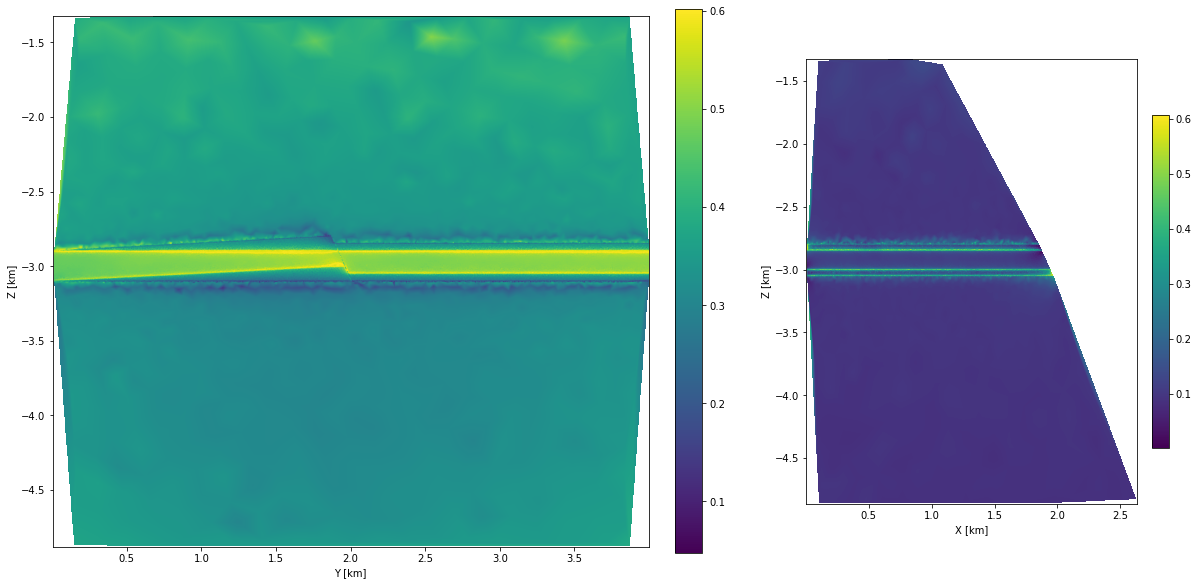

In [8]:
Zeerijp.plot_Xflt_str(step=28,dsp=1)

85313
53028
[      0 -138332]


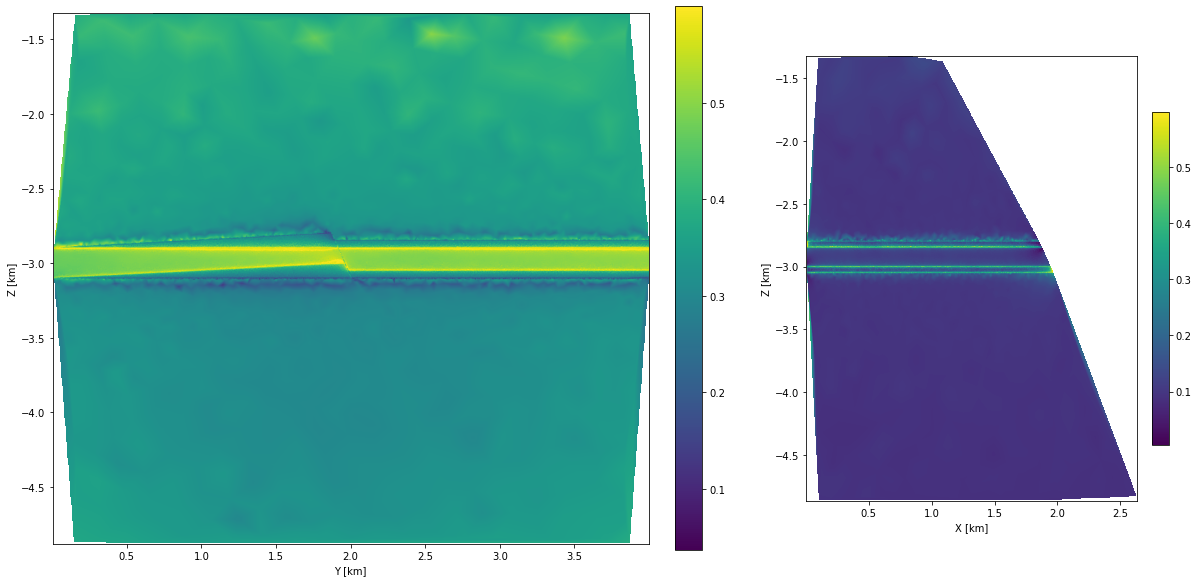

In [13]:
Zeerijp.plot_Xflt_str_dyn(step='step 28',dsp=1,timedyn=1)

# Dyn slip Xflt

In [34]:
font = {'family' : 'serif',
        'size'   : 20}
# plt.style.use('seaborn-pastel') 
matplotlib.rc('font', **font)
matplotlib.rc('image', cmap='jet')
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

85313
53028
[      0 -138332]


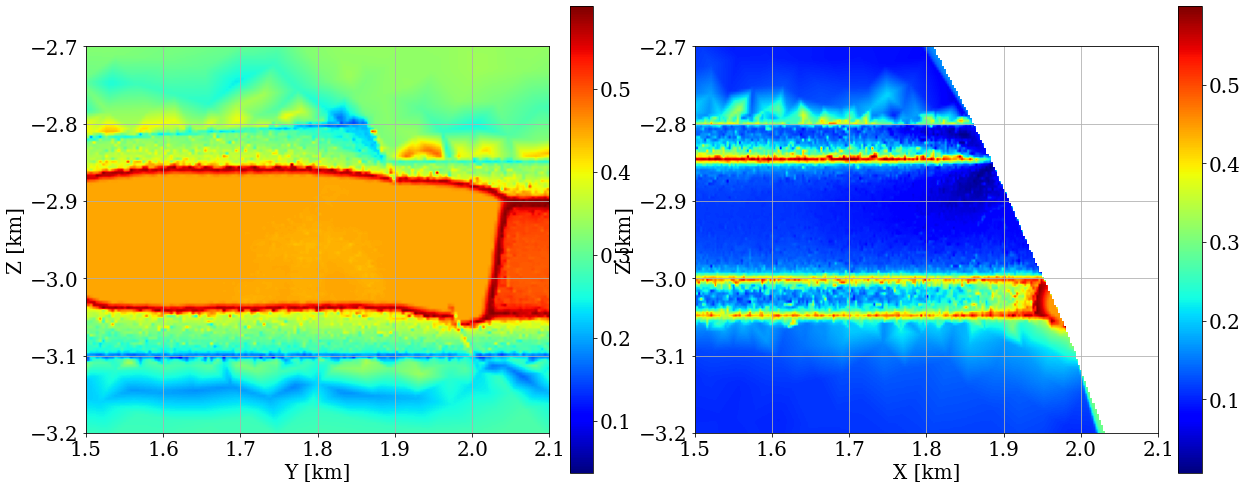

In [54]:
# plot the dynamic result
xlim0 = 1.5 # 1.5 0.2
xlim1 = 2.1 # 2.5 0.8
zlim1 = -2.7
zlim0 = -3.2
timedyn = 28

Zeerijp.plot_Xflt_str_dyn(step='step 28',dsp=1,timedyn=timedyn,axis=0,xlim0=xlim0,xlim1=xlim1,zlim0=zlim0,zlim1=zlim1) # axis 0 for SCU, 1 for slip

85313
53028
[      0 -138332]


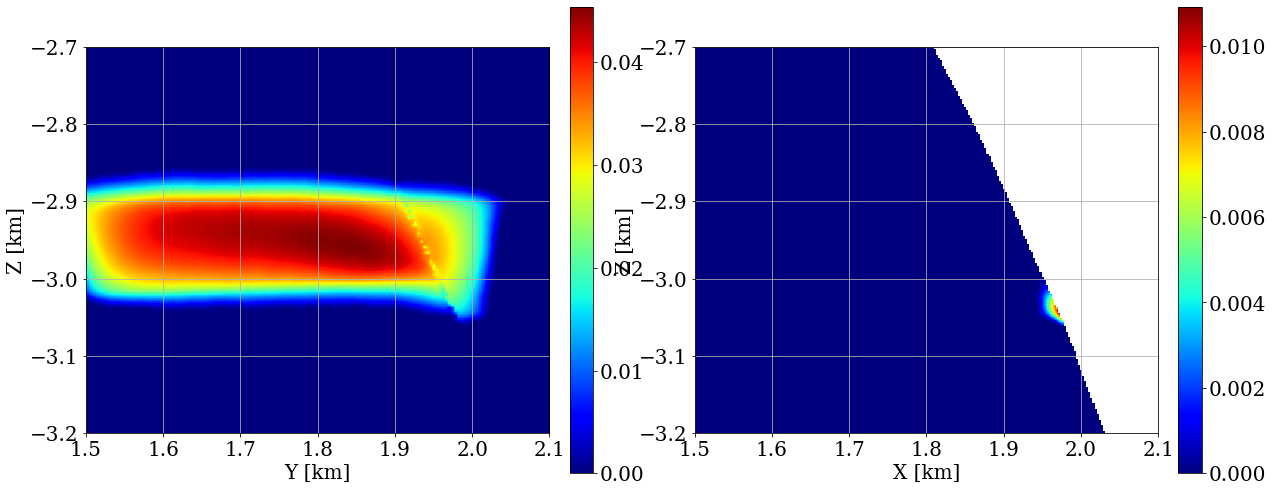

In [55]:
Zeerijp.plot_Xflt_str_dyn(step='step 28',dsp=1,timedyn=timedyn,axis=1,xlim0=xlim0,xlim1=xlim1,zlim0=zlim0,zlim1=zlim1) # axis 0 for SCU, 1 for slip